In [1]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from numpy import NaN
import matplotlib
from pylab import rcParams

#%matplotlib widget, camera ready submission problem
matplotlib.rc('pdf', fonttype=42)
matplotlib.rcParams['savefig.dpi'] = 300
rcParams.update({'figure.autolayout': True})
from matplotlib.ticker import FormatStrFormatter

def readfile(filename):
    types = {'frequency': float,'power': float}
    df = pd.read_csv(filename, skiprows=0, header=None, delim_whitespace=False, delimiter=' ')
    df.columns = ['frequency', 'power']
    df.dropna(inplace=True)
    #print(df.describe())
    return df

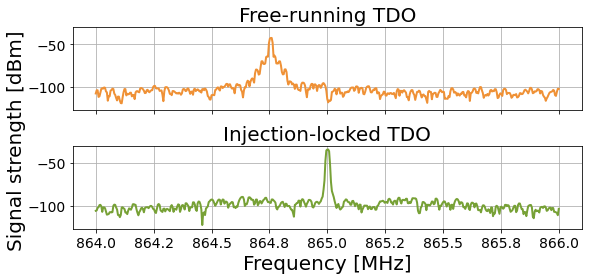

In [5]:
Title = ["Free-running TDO", "Injection-locked TDO"]

DF = []
path = './logs/no_carrier/'
filename = 'data0'
df = readfile(path + filename + ".csv")
DF.append(df)

path = './logs/carrier_txgain60/'
filename = 'data0'
df = readfile(path + filename + ".csv")
DF.append(df)

# Plot
from pylab import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['figure.figsize'] = 8, 4
fig, axs = plt.subplots(2,1, sharey=True)

color = ["#EF9136", "#77A136"]

for i in range(2):
    ax = axs[i]
    df = DF[i]
    ax.plot(df['frequency']/1e6, df['power'], color=color[i], linewidth=2)
    ax.grid()
    ax.set_title(Title[i], fontsize=20)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#     ax.tick_params(labelbottom=False, labelsize=14)

# axs[0].set_xlim([864.3, 865.7])
# axs[1].set_xlim([863.8, 865.5])

axs[0].tick_params(labelsize=14)
axs[0].tick_params(labelbottom=False, labelsize=14)
axs[1].tick_params(labelsize=14)
axs[1].set_xlabel('Frequency [MHz]', fontsize=20)
plt.tight_layout()
fig.text(0.00, 0.5, 'Signal strength [dBm]', va='center', ha='center', rotation='vertical', fontsize=20)
plt.savefig('./stablewithcarrier.pdf', bbox_inches = "tight")